In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='y', ylabel='count'>

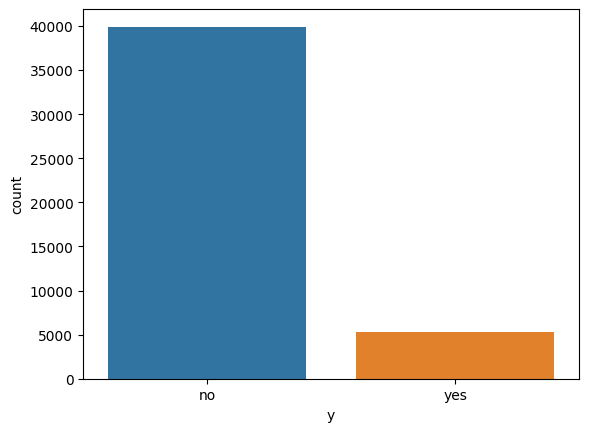

In [48]:
sns.countplot(data=df, x='y')

<Axes: xlabel='y', ylabel='age'>

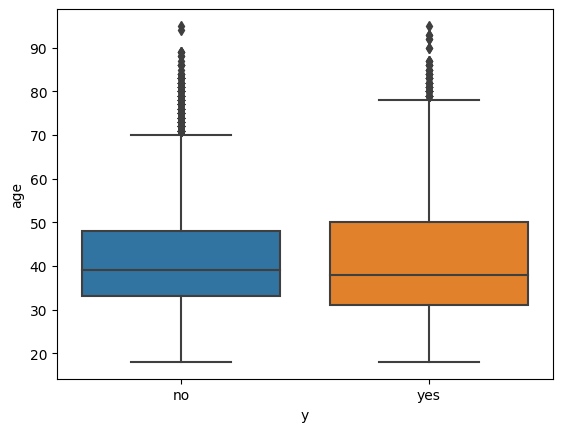

In [49]:
sns.boxplot(data=df, x='y', y='age')

In [6]:
dum_columns = pd.get_dummies(df[['job', 'marital', 'education', 'housing','loan', 'poutcome', 'contact', 'month', 'y']], drop_first=True)

In [5]:
df_num = df[['age', 'balance', 'campaign', 'pdays','previous', 'duration']]

In [7]:
cor_df = pd.concat([df_num, dum_columns], axis=1, join='inner')

In [8]:
corelations = cor_df.corr().sort_values(['y_yes'])['y_yes'][:-1]

In [9]:
corelations

poutcome_unknown      -0.167051
contact_unknown       -0.150935
housing_yes           -0.139173
month_may             -0.102500
campaign              -0.073172
job_blue-collar       -0.072083
loan_yes              -0.068185
marital_married       -0.060260
education_secondary   -0.036388
month_jul             -0.034382
job_services          -0.027864
job_entrepreneur      -0.019662
month_jun             -0.016805
job_housemaid         -0.015195
month_nov             -0.014937
job_technician        -0.008970
month_jan             -0.008783
month_aug             -0.008536
job_unknown            0.000267
job_self-employed      0.000855
education_unknown      0.012053
contact_telephone      0.014042
job_unemployed         0.020390
age                    0.025155
poutcome_other         0.031955
job_management         0.032919
month_feb              0.038417
balance                0.052838
marital_single         0.063526
education_tertiary     0.066448
month_dec              0.075164
job_stud

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'poutcome_unknown'),
  Text(1, 0, 'contact_unknown'),
  Text(2, 0, 'housing_yes'),
  Text(3, 0, 'month_may'),
  Text(4, 0, 'campaign'),
  Text(5, 0, 'job_blue-collar'),
  Text(6, 0, 'loan_yes'),
  Text(7, 0, 'marital_married'),
  Text(8, 0, 'education_secondary'),
  Text(9, 0, 'month_jul'),
  Text(10, 0, 'job_services'),
  Text(11, 0, 'job_entrepreneur'),
  Text(12, 0, 'month_jun'),
  Text(13, 0, 'job_housemaid'),
  Text(14, 0, 'month_nov'),
  Text(15, 0, 'job_technician'),
  Text(16, 0, 'month_jan'),
  Text(17, 0, 'month_aug'),
  Text(18, 0, 'job_unknown'),
  Text(19, 0, 'job_self-employed'),
  Text(20, 0, 'education_unknown'),
  Text(21, 0, 'contact_telephone'),
  Text(22, 0, 'job_unemployed'),
  Text(23, 0, 'age'),
  Text(24, 0, 'poutcome_other'),
  Text(25, 0, 'job_management'),
  Text(

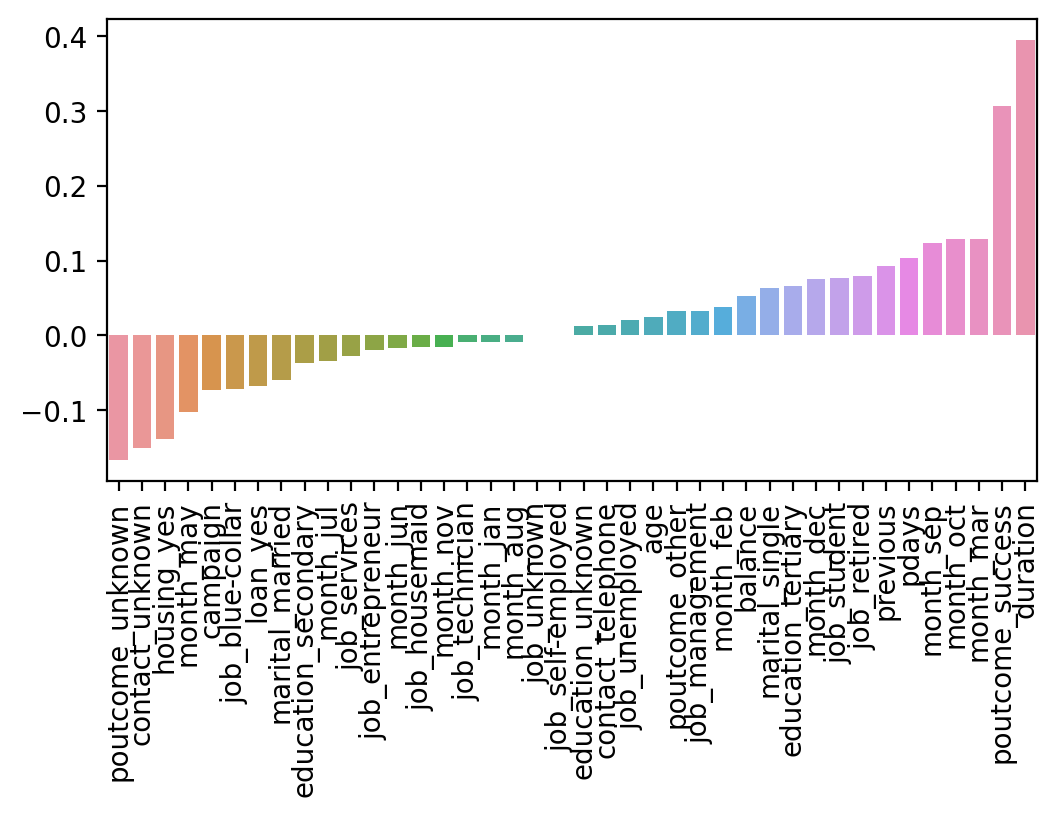

In [10]:
plt.figure(figsize=(6,3), dpi=200)
sns.barplot(x=corelations.index, y=corelations.values)
plt.xticks(rotation=90)

<Axes: xlabel='balance', ylabel='duration'>

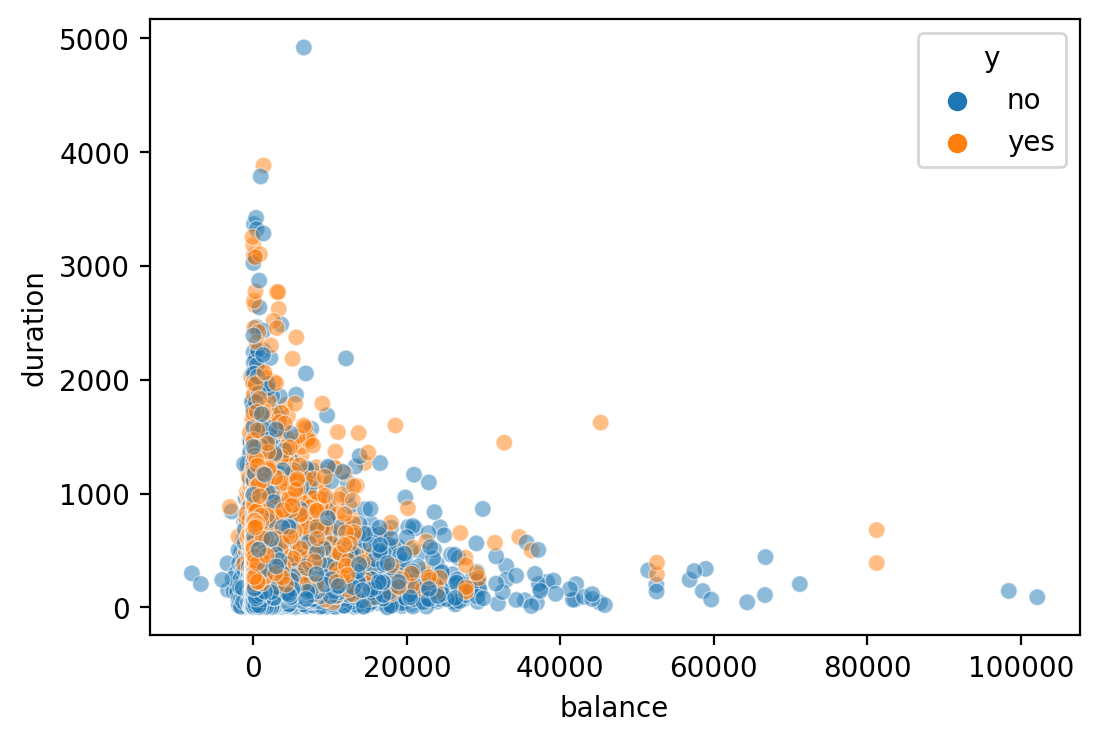

In [15]:
plt.figure(figsize=(6,4), dpi=200)
sns.scatterplot(data=df, x='balance', y='duration', hue='y', alpha=0.5)

In [5]:
for n in range(len(df)):
    if df.loc[n]['campaign']<20:
        df.loc[n, 'campaign_range']='0 - 19 range'
    elif 20<=df.loc[n]['campaign']<40:
        df.loc[n, 'campaign_range']='20 - 39 range'
    else:
        df.loc[n, 'campaign_range']='40 and more'

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,campaign_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0 - 19 range
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0 - 19 range
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0 - 19 range
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0 - 19 range
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0 - 19 range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0 - 19 range
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0 - 19 range
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0 - 19 range
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0 - 19 range


<Axes: xlabel='campaign_range', ylabel='count'>

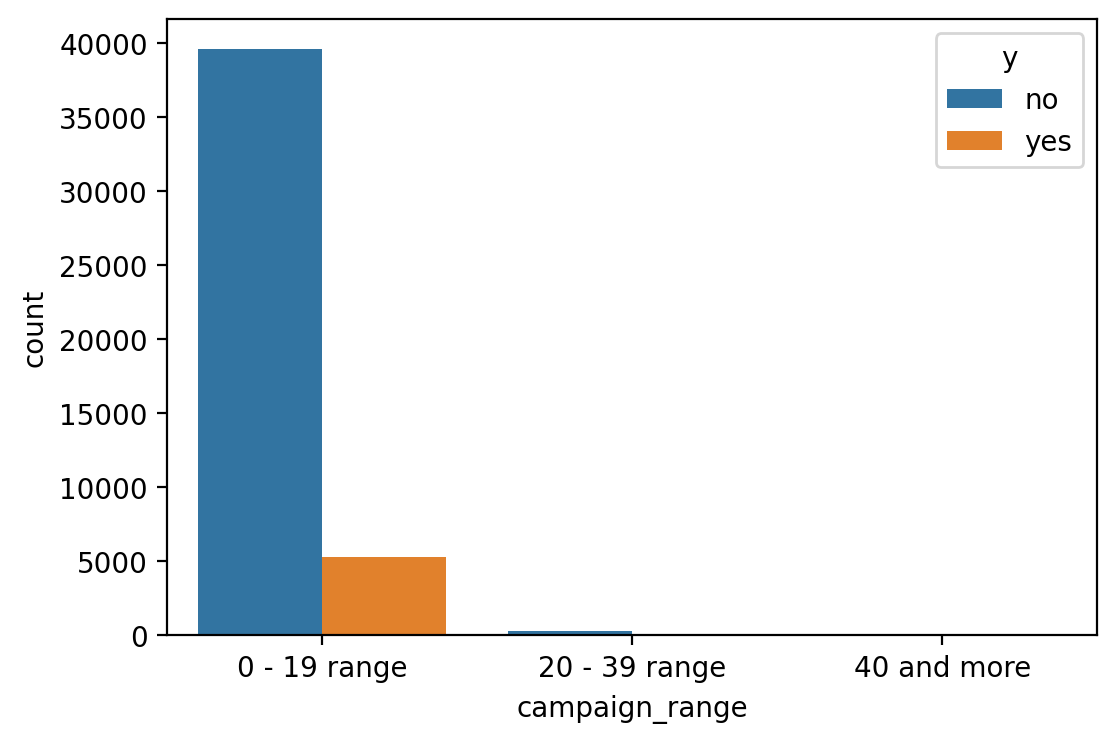

In [18]:
plt.figure(figsize=(6,4), dpi=200)
sns.countplot(data=df, x='campaign_range', hue='y')


In [6]:
X = df.drop(['y', 'contact', 'day', 'campaign_range'], axis=1)
y= df['y']

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [46]:
dtc = DecisionTreeClassifier()

In [47]:
param_grid = {'max_depth':[3,4,5,6,10,15]}

In [48]:
grid = GridSearchCV(dtc, param_grid=param_grid)

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 10, 15]})

In [50]:
grid.best_params_

{'max_depth': 5}

In [51]:
y_pred = grid.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
confusion_matrix(y_test, y_pred)

array([[3894,   94],
       [ 379,  155]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      3988
         yes       0.62      0.29      0.40       534

    accuracy                           0.90      4522
   macro avg       0.77      0.63      0.67      4522
weighted avg       0.88      0.90      0.88      4522



In [55]:
features = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importances'])

In [56]:
features[features['Feature Importances']>0].sort_values('Feature Importances')

,Feature Importances
poutcome_unknown,0.001168
month_nov,0.001213
marital_married,0.002349
month_jul,0.003206
balance,0.006150
month_may,0.006537
month_oct,0.009171
month_mar,0.016801
pdays,0.022350
age,0.024571


[Text(0.5, 0.9166666666666666, 'duration <= 521.5\ngini = 0.206\nsamples = 40689\nvalue = [35934, 4755]'),
 Text(0.25, 0.75, 'poutcome_success <= 0.5\ngini = 0.142\nsamples = 36216\nvalue = [33425, 2791]'),
 Text(0.125, 0.5833333333333334, 'duration <= 206.5\ngini = 0.111\nsamples = 35044\nvalue = [32981, 2063]'),
 Text(0.0625, 0.4166666666666667, 'month_mar <= 0.5\ngini = 0.053\nsamples = 22438\nvalue = [21831, 607]'),
 Text(0.03125, 0.25, 'month_oct <= 0.5\ngini = 0.047\nsamples = 22216\nvalue = [21684, 532]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.042\nsamples = 21935\nvalue = [21467, 468]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.352\nsamples = 281\nvalue = [217, 64]'),
 Text(0.09375, 0.25, 'duration <= 79.0\ngini = 0.447\nsamples = 222\nvalue = [147, 75]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.484\nsamples = 180\nvalue = [106, 74]'),
 Text(0.1875, 0.4166666666666667, 'ho

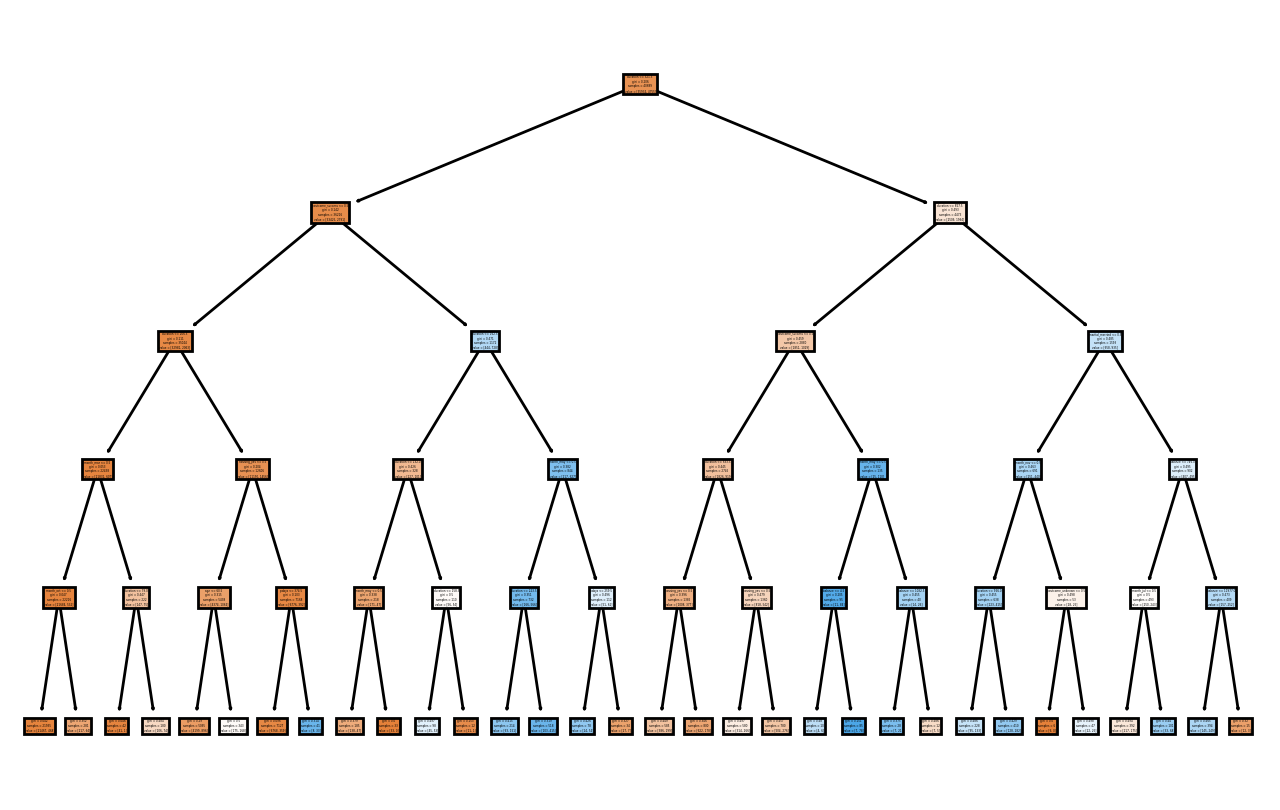

In [57]:
plt.figure(figsize=(8,5), dpi=200)
plot_tree(grid.best_estimator_, feature_names=X.columns, filled=True)

Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [59]:
rfc_mod = RandomForestClassifier()

In [60]:
rf_param_grid = {'n_estimators':[80, 100, 200, 250],
              'bootstrap': [True, False],
              'oob_score': [True, False]} # oob_score only makes sense when bootstrap=True

In [61]:
rf_grid = GridSearchCV(rfc_mod, param_grid=rf_param_grid)

In [62]:
rf_grid.fit(X_train, y_train)

c:\Users\marle\Files\Anaconda\envs\data_sience\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marle\Files\Anaconda\envs\data_sience\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marle\Files\Anaconda\envs\data_sience\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [80, 100, 200, 250],
                         'oob_score': [True, False]})

In [63]:
rf_grid.best_params_

{'bootstrap': True, 'n_estimators': 100, 'oob_score': True}

In [64]:
rf_features = pd.DataFrame(data=rf_grid.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importances'])
rf_features[features['Feature Importances']>0].sort_values('Feature Importances')

,Feature Importances
poutcome_unknown,0.008344
month_nov,0.009144
month_jul,0.010405
month_may,0.011766
month_oct,0.012336
marital_married,0.012957
month_mar,0.013641
housing_yes,0.024380
pdays,0.047411
poutcome_success,0.051238


In [65]:
y_pred = rf_grid.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[3874,  114],
       [ 335,  199]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      3988
         yes       0.64      0.37      0.47       534

    accuracy                           0.90      4522
   macro avg       0.78      0.67      0.71      4522
weighted avg       0.89      0.90      0.89      4522



Ada Boost Classifier

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
error_rates = []

for n in range(1,len(X.columns)+1):
    
    abc = AdaBoostClassifier(n_estimators=n)
    abc.fit(X_train,y_train)
    preds = abc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

Text(0, 0.5, 'error')

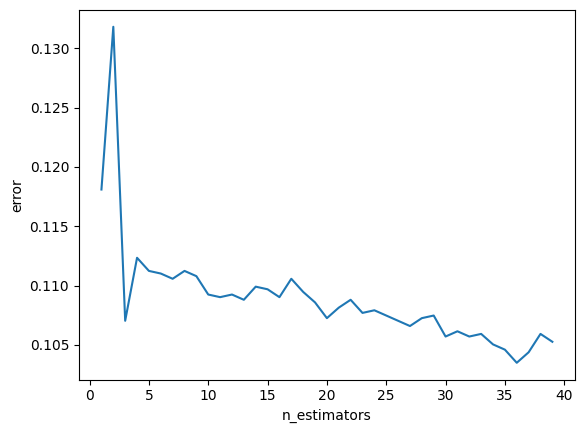

In [70]:
plt.plot(range(1,len(X.columns)+1),error_rates)
plt.xlabel('n_estimators')
plt.ylabel('error')

In [80]:
abc_model = AdaBoostClassifier(n_estimators=3)

In [81]:
abc_model.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[3855,  133],
       [ 343,  191]], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      3988
         yes       0.59      0.36      0.45       534

    accuracy                           0.89      4522
   macro avg       0.75      0.66      0.69      4522
weighted avg       0.88      0.89      0.88      4522



In [85]:
abc_features = pd.DataFrame(data=abc_model.feature_importances_, index=X.columns, columns=['Feature Importances'])
abc_features[features['Feature Importances']>0].sort_values('Feature Importances')

,Feature Importances
age,0.000000
balance,0.000000
pdays,0.000000
marital_married,0.000000
housing_yes,0.000000
poutcome_unknown,0.000000
month_jul,0.000000
month_mar,0.000000
month_may,0.000000
month_nov,0.000000


Gradient Boosting Classifier

In [86]:
gb = GradientBoostingClassifier()

In [87]:
gb_param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [88]:
gb_grid = GridSearchCV(gb, gb_param_grid)

In [89]:
gb_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [90]:
gb_grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [91]:
y_pred = gb_grid.predict(X_test)

In [92]:
confusion_matrix(y_test, y_pred)

array([[3847,  141],
       [ 308,  226]], dtype=int64)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.96      0.94      3988
         yes       0.62      0.42      0.50       534

    accuracy                           0.90      4522
   macro avg       0.77      0.69      0.72      4522
weighted avg       0.89      0.90      0.89      4522



In [94]:
gb_features = pd.DataFrame(data=gb_grid.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importances'])
gb_features[features['Feature Importances']>0].sort_values('Feature Importances')

,Feature Importances
poutcome_unknown,0.000446
month_nov,0.002580
month_jul,0.005186
marital_married,0.005341
month_may,0.008056
month_oct,0.019957
month_mar,0.028026
balance,0.031205
housing_yes,0.041006
pdays,0.060401


K-Nearest Neighbors

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(weights='distance')

In [98]:
k_values = list(range(1,20))

In [99]:
knn_param_grid = {'n_neighbors': k_values}

In [107]:
knn_grid = GridSearchCV(knn, knn_param_grid)

In [108]:
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [109]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=18, weights='distance')

In [110]:
y_predict = knn_grid.predict(X_test)

In [111]:
confusion_matrix(y_test, y_predict)

array([[3863,  125],
       [ 413,  121]], dtype=int64)

In [112]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93      3988
         yes       0.49      0.23      0.31       534

    accuracy                           0.88      4522
   macro avg       0.70      0.60      0.62      4522
weighted avg       0.85      0.88      0.86      4522



I got the best performance with the Gradient Boosting Classifier. It is easy to see that trees methods performed better than K Nearest Neighbors. The results indicate a significant class imbalance, with the "no" class having much higher precision, recall, and F1-score compared to the "yes" class. This suggests that the model performs well with the majority class but struggles with the minority class. A way to improve the results can be to experiment with hyperparameters, adjust parameters like n_estimators, max_depth, and min_samples_split to find the optimal configuration, use techniques like oversampling (increasing the number of instances of the minority class) or undersampling (decreasing the number of instances of the majority class) to balance the class distribution, or try to use different types of models.